<a href="https://colab.research.google.com/github/mohammadAliMkh/Tensorflow/blob/main/multiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [72]:
x , y = make_blobs(n_samples = 1000 , n_features = 2 , centers = 4 , cluster_std = 1)

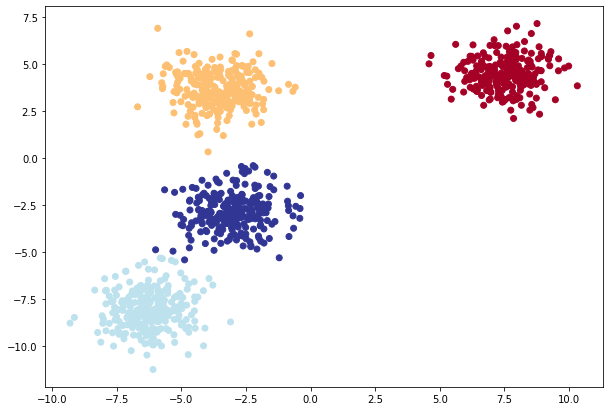

In [73]:
plt.figure(figsize = (10 , 7))
plt.scatter(x[: , 0] , x[: , 1] , c = y , cmap = plt.cm.RdYlBu)

In [74]:
y_one_hoted = tf.one_hot(y , depth  = 4)

In [75]:
train_data , test_data , train_label , test_label = train_test_split(x , y_one_hoted.numpy() , test_size = 0.2 , shuffle = True)
len(train_data) , len(train_label)

(800, 800)

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (2,) , dtype = tf.float32),
    tf.keras.layers.Dense(10 , activation = "relu"),
    tf.keras.layers.Dense(4 , activation = "softmax")
])

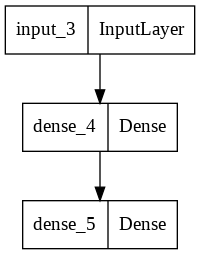

In [77]:
tf.keras.utils.plot_model(model)

In [78]:
model.compile(loss = "categorical_crossentropy" , optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) , metrics = ["mae"])

In [79]:
history = model.fit(train_data , train_label ,  epochs = 100 , validation_data = (test_data , test_label) , validation_steps=len(test_data))

Epoch 1/100
25/25 [==============================] - 1s 33ms/step - loss: 1.8268 - mae: 0.3573 - val_loss: 1.1156 - val_mae: 0.3092
Epoch 2/100
25/25 [==============================] - 0s 18ms/step - loss: 0.8642 - mae: 0.2597 - val_loss: 0.7699 - val_mae: 0.2312
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.6984 - mae: 0.2181 - val_loss: 0.6737 - val_mae: 0.2100
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.6340 - mae: 0.2027 - val_loss: 0.6232 - val_mae: 0.1989
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.5948 - mae: 0.1940 - val_loss: 0.5885 - val_mae: 0.1885
Epoch 6/100
25/25 [==============================] - 0s 16ms/step - loss: 0.5673 - mae: 0.1868 - val_loss: 0.5589 - val_mae: 0.1832
Epoch 7/100
25/25 [==============================] - 0s 16ms/step - loss: 0.5413 - mae: 0.1810 - val_loss: 0.5294 - val_mae: 0.1771
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.

In [80]:
evaluation = model.evaluate(test_data , test_label)
evaluation

7/7 [==============================] - 0s 3ms/step - loss: 0.0407 - mae: 0.0182


[0.04066133871674538, 0.018244827166199684]

In [81]:
model_preds = model.predict(test_data)

7/7 [==============================] - 0s 2ms/step


In [82]:
preds = tf.argmax(model_preds , axis = 1)
preds[:10].numpy()

array([1, 0, 2, 3, 0, 3, 1, 1, 1, 2])

In [83]:
import requests
import os
r = requests.get( "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

if os.path.exists("/content/helper_functions.py"):
  print("file already exists")
else:
  f = open("helper_functions.py" , 'wb')
  f.write(r.content)

file already exists


In [84]:
def plot_decision_boundary(model , x , y):
  """Polots decision boundaries of model predicting on X in comarison to y with tensorflow.
  """
  x_min , x_max = x[: , 0].min() - 0.1 , x[: , 0].max() + 0.1
  y_min , y_max = x[: , 1].min() - 0.1 , x[: , 1].max() + 0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max , 101) , np.linspace(y_min , y_max , 101))

  data = np.column_stack((xx.ravel() , yy.ravel()))

  preds_without_argmax = model.predict(data , verbose = 0)
  preds = tf.argmax(preds_without_argmax , axis = 1)
  
  preds = tf.reshape(preds , shape = xx.shape).numpy()

  plt.figure(figsize = (10 , 7))
  plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

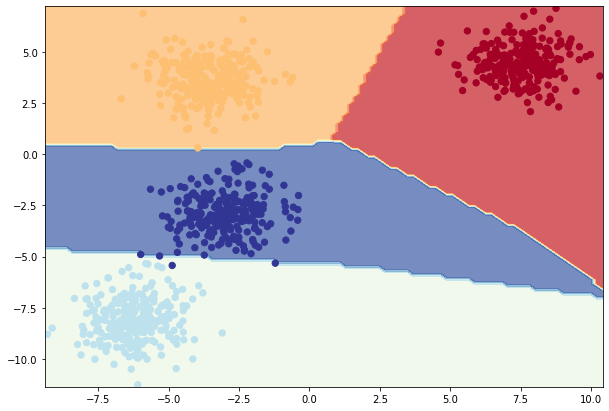

In [90]:
plot_decision_boundary(model , x , y)